In [1]:
import pandas as pd
import numpy as np
import emoji
import nltk

In [2]:
import pickle
import json
import re

In [7]:
filename = "/Users/imac/Documents/Tweets data/Trump_tweets.pkl"
filename2 = "/Users/alexkowalski/Documents/Biden_tweets.pkl"

In [8]:
with open(filename, 'rb') as f:
    data = pickle.load(f)

In [9]:
#data

In [35]:
full_text = []

with open(filename, "rb") as file:
    while True:
        try:
            tweet = pickle.load(file)
            #full_text.append(tweet['full_text'])
            full_text.append(tweet)
            #print(tweet.keys())
        except EOFError:
            break

In [36]:
len(full_text)

118230

In [37]:
type(full_text)

list

In [38]:
#with open("sample.json", "w") as outfile: 
#    json.dump(full_text, outfile)

In [39]:
df = pd.DataFrame(full_text)

In [40]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,Thu Oct 22 23:59:59 +0000 2020,1319428320140800000,1319428320140800000,"RT @ThomboyD: Ok, how many warnings does trump...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Oct 22 23:59:59 +0000 2020,1319428319809593346,1319428319809593346,RT @JonahDispatch: Lara Trump has said three t...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 22 23:59:59 +0000 2020,1319428319801212934,1319428319801212934,RT @jburnmurdoch: I particularly love this won...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Oct 22 23:59:59 +0000 2020,1319428319750680576,1319428319750680576,RT @AliVelshi: BREAKING: A federal judge in NJ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Oct 22 23:59:59 +0000 2020,1319428319415209985,1319428319415209985,RT @RepsForBiden: Let’s make sure Trump is bei...,False,"[0, 139]","{'hashtags': [{'text': 'BejingDon', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118225,Mon Dec 14 23:57:04 +0000 2020,1338634141240180737,1338634141240180737,RT @mkraju: Trump’s Hill allies blindsided by ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
118226,Mon Dec 14 23:57:04 +0000 2020,1338634141093474307,1338634141093474307,RT @CNNPolitics: JUST IN: The Electoral Colleg...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
118227,Mon Dec 14 23:57:04 +0000 2020,1338634140892229634,1338634140892229634,RT @CNBCnow: BREAKING: President-elect Joe Bid...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
118228,Mon Dec 14 23:57:04 +0000 2020,1338634140703449100,1338634140703449100,@RomanSaluter @TitusNation The crowd is cheeri...,False,"[27, 146]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.338614e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# show nulls in columns
df.isnull().sum(axis = 0)

created_at                        0
id                                0
id_str                            0
full_text                         0
truncated                         0
display_text_range                0
entities                          0
metadata                          0
source                            0
in_reply_to_status_id         95911
in_reply_to_status_id_str     95911
in_reply_to_user_id           95175
in_reply_to_user_id_str       95175
in_reply_to_screen_name       95175
user                              0
geo                          118228
coordinates                  118228
place                        117521
contributors                 118230
retweeted_status              34996
is_quote_status                   0
retweet_count                     0
favorite_count                    0
favorited                         0
retweeted                         0
lang                              0
possibly_sensitive            99870
extended_entities           

In [42]:
#Converting the list to a data frame for further analysis

In [43]:
# take only one column with tweets
#df = pd.DataFrame (full_text,columns=['full_text'])

In [44]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,Thu Oct 22 23:59:59 +0000 2020,1319428320140800000,1319428320140800000,"RT @ThomboyD: Ok, how many warnings does trump...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Oct 22 23:59:59 +0000 2020,1319428319809593346,1319428319809593346,RT @JonahDispatch: Lara Trump has said three t...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 22 23:59:59 +0000 2020,1319428319801212934,1319428319801212934,RT @jburnmurdoch: I particularly love this won...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Oct 22 23:59:59 +0000 2020,1319428319750680576,1319428319750680576,RT @AliVelshi: BREAKING: A federal judge in NJ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Oct 22 23:59:59 +0000 2020,1319428319415209985,1319428319415209985,RT @RepsForBiden: Let’s make sure Trump is bei...,False,"[0, 139]","{'hashtags': [{'text': 'BejingDon', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118225,Mon Dec 14 23:57:04 +0000 2020,1338634141240180737,1338634141240180737,RT @mkraju: Trump’s Hill allies blindsided by ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
118226,Mon Dec 14 23:57:04 +0000 2020,1338634141093474307,1338634141093474307,RT @CNNPolitics: JUST IN: The Electoral Colleg...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
118227,Mon Dec 14 23:57:04 +0000 2020,1338634140892229634,1338634140892229634,RT @CNBCnow: BREAKING: President-elect Joe Bid...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
118228,Mon Dec 14 23:57:04 +0000 2020,1338634140703449100,1338634140703449100,@RomanSaluter @TitusNation The crowd is cheeri...,False,"[27, 146]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.338614e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /Users/imac/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [46]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet

In [47]:
df['full_text'] = df['full_text'].map(lambda x: cleaner(x))

In [48]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,Thu Oct 22 23:59:59 +0000 2020,1319428320140800000,1319428320140800000,": , how many does trump get before his first m...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Oct 22 23:59:59 +0000 2020,1319428319809593346,1319428319809593346,: Trump said three times during an interview o...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 22 23:59:59 +0000 2020,1319428319801212934,1319428319801212934,: I particularly love this wonderful graphic f...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Oct 22 23:59:59 +0000 2020,1319428319750680576,1319428319750680576,: BREAKING : A federal judge in a lawsuit by t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Oct 22 23:59:59 +0000 2020,1319428319415209985,1319428319415209985,: Let ’ s make sure Trump is being about his s...,False,"[0, 139]","{'hashtags': [{'text': 'BejingDon', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118225,Mon Dec 14 23:57:04 +0000 2020,1338634141240180737,1338634141240180737,: Trump ’ s Hill allies by resignation . about...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
118226,Mon Dec 14 23:57:04 +0000 2020,1338634141093474307,1338634141093474307,: JUST IN : The Electoral College President - ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
118227,Mon Dec 14 23:57:04 +0000 2020,1338634140892229634,1338634140892229634,: BREAKING : President - elect Joe Electoral C...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
118228,Mon Dec 14 23:57:04 +0000 2020,1338634140703449100,1338634140703449100,The crowd is cheering on his that are almost i...,False,"[27, 146]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.338614e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Word cloud

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [51]:
mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in df.full_text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

There are 11682719 words in the combination of all tweets.


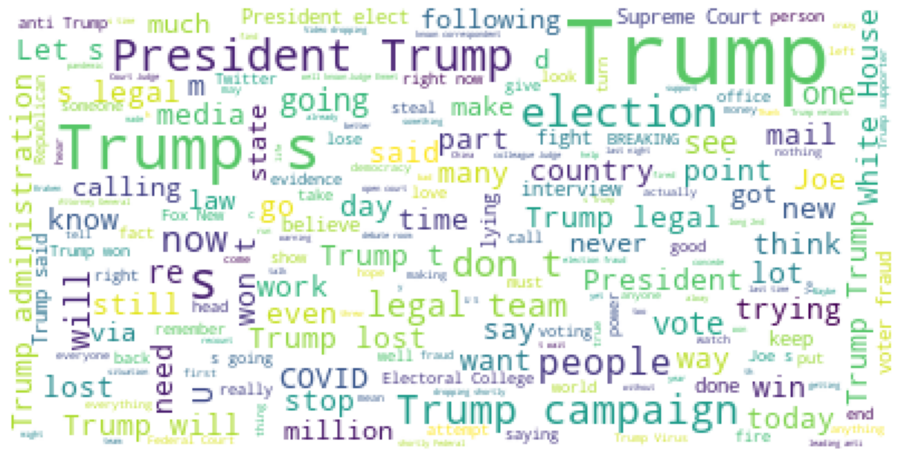

In [52]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

In [53]:
# Most popular words

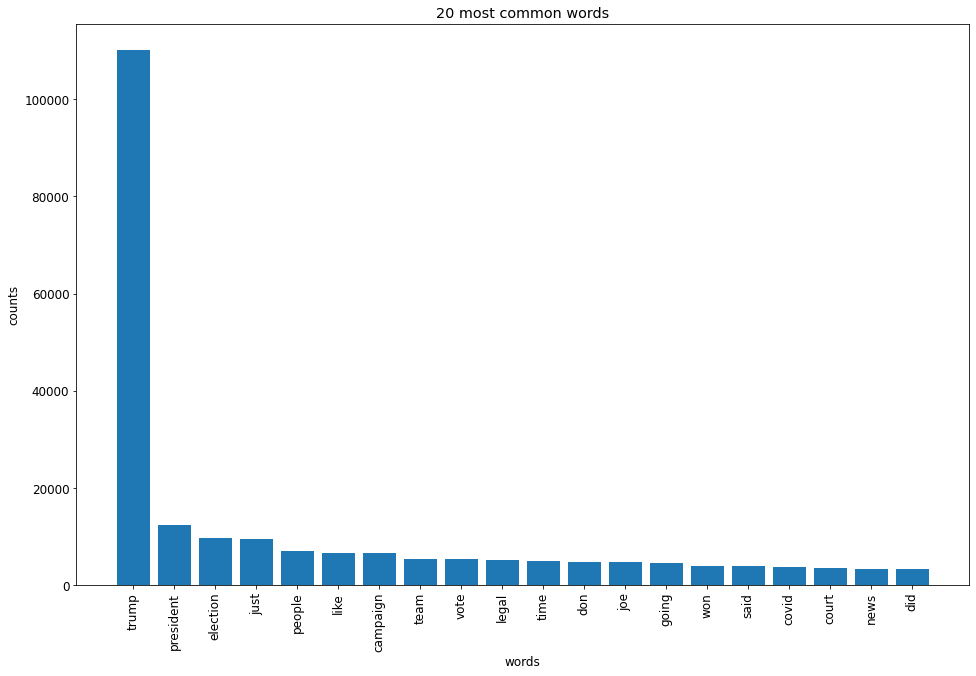

In [54]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('20 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['full_text'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [55]:
# group and separate tweets by date

In [56]:
new_df = []
#new_df = df


#df_biden.created_at[0][4:10]
#new_df

for item in df.created_at:
    new_df.append(item[4:10])
    
replaced = []

for item in new_df:
    replaced_val = item.replace("Oct", "10")
    replaced_val = item.replace("Nov", "11")
    replaced_val = item.replace("Dec", "12")
    replaced.append(replaced_val) 
    
    
#for num, name in enumerate(new_df, start = 0):
#   print(new_df[num].replace("Oct", "10"))
    #new_df.append(new_df[num].replace("Oct", "10"))

In [164]:
#new_df
#replaced

In [57]:
new_df = df

for i in range(len(new_df.created_at)):
    #new_df.created_at[i] = new_df.created_at[i].replace("Oct", "10")
    #new_df.created_at[i] = new_df.created_at[i].replace("Nov", "11")
    #new_df.created_at[i] = new_df.created_at[i].replace("Dec", "12")
    new_df.created_at[i] = new_df.created_at[i][4:10]

<ipython-input-57-e104e11e1a6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.created_at[i] = new_df.created_at[i][4:10]


In [58]:
new_df.created_at.unique()
len(new_df.created_at.unique())

8

In [183]:
# The approach of "cleaning" the dates:

In [59]:
df.created_at[0]

'Oct 22'

In [61]:
new = df.created_at[0][4:10]
new

'22'

In [64]:
for item in df.created_at:
    item = item.replace("Oct", "10")
    item = item.replace("Nov", "11")
    item = item.replace("Dec", "12")

In [75]:
#for item in df_biden.created_at:
#    print(item)

In [63]:
df.created_at.unique()

array(['Oct 22', 'Nov 04', 'Nov 09', 'Nov 15', 'Nov 22', 'Nov 29',
       'Dec 06', 'Dec 14'], dtype=object)

In [65]:
from datetime import datetime

In [66]:
datetime.now()

datetime.datetime(2021, 6, 20, 11, 48, 27, 258204)

In [67]:
df.created_at

0         Oct 22
1         Oct 22
2         Oct 22
3         Oct 22
4         Oct 22
           ...  
118225    Dec 14
118226    Dec 14
118227    Dec 14
118228    Dec 14
118229    Dec 14
Name: created_at, Length: 118230, dtype: object

In [51]:
#compression_opts = dict(method='zip', archive_name='biden_cleaned.csv')

In [36]:
#df_biden.to_csv('biden_cleaned.zip', index=False, compression=compression_opts)  

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118230 entries, 0 to 118229
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   created_at                 118230 non-null  object 
 1   id                         118230 non-null  int64  
 2   id_str                     118230 non-null  object 
 3   full_text                  118230 non-null  object 
 4   truncated                  118230 non-null  bool   
 5   display_text_range         118230 non-null  object 
 6   entities                   118230 non-null  object 
 7   metadata                   118230 non-null  object 
 8   source                     118230 non-null  object 
 9   in_reply_to_status_id      22319 non-null   float64
 10  in_reply_to_status_id_str  22319 non-null   object 
 11  in_reply_to_user_id        23055 non-null   float64
 12  in_reply_to_user_id_str    23055 non-null   object 
 13  in_reply_to_screen_name    23

In [70]:
fav_max = np.max(df['favorite_count'])
rt_max  = np.max(df['retweet_count'])

fav = df[df.favorite_count == fav_max].index[0]
rt  = df[new_df.retweet_count == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(df['full_text'][fav]))
print("Number of likes: {}".format(fav_max))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(df['full_text'][rt]))
print("Number of retweets: {}".format(rt_max))

The tweet with more likes is: 
in debate room from a well - known correspondent from a leading anti - Trump network “ It ’ s going to be a long 2nd term ”
Number of likes: 43787
The tweet with more retweets is: 
: Wear a mask . Wash your . Vote out Trump .
Number of retweets: 218367


In [124]:
# Sentiment analysis

In [71]:
from textblob import TextBlob

In [72]:
def sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [73]:
df['SA'] = np.array([ sentiment(tweet) for tweet in df['full_text'] ])

pos_tweets = [ tweet for index, tweet in enumerate(df['full_text']) if df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['full_text']) if df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['full_text']) if df['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['full_text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['full_text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df['full_text'])))

sa =[pos_tweets,neu_tweets,neg_tweets]

Percentage of positive tweets: 36.81130000845809%
Percentage of neutral tweets: 40.566692040937156%
Percentage de negative tweets: 22.622007950604754%


In [74]:
# Sentiment Analysis by Vader

In [75]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based 
# sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 
# It is fully open-sourced under the [MIT License]

In [77]:
#Vader Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [78]:
sentiment = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(text):
    score = sentiment.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [80]:
df['VSA'] = np.array([ sentiment_analyzer_scores(tweet) for tweet in df['full_text'] ])

pos_tweets = [ tweet for index, tweet in enumerate(df['full_text']) if df['VSA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['full_text']) if df['VSA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['full_text']) if df['VSA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['full_text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['full_text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df['full_text'])))

Percentage of positive tweets: 36.090670726549945%
Percentage of neutral tweets: 28.243254673094814%
Percentage de negative tweets: 35.66607460035524%


In [137]:
# SA — Sentiment Analysis Score from Textblob
# VSA — Sentiment Analysis Score from Vader